# Traffic Characteristic Statistics

### Purpose & Motivation

In reviewing the heatmap for speed, it was observed that parts of the patterns are consistent. To take the analysis a step further,the task in this notebook is to obtain characteristic statistics (mean and standard deviation) for each of the metrics - Speed, Flow and Occupancy. Because there may be variability with the day of the week, each day of the week is heatmapped.

### Direction from Advisor
One of the directions from the last meeting with capstone advisor, it was suggested that we create mean and standard deviation plots that show by day. For each day and each variable, there should be 3 heatmaps that show Mean, Mean - STD, Mean + STD.   Each day should have nine plots.  

### Tasks/Questions to Answer
#### Questions to Answer
- For speed, flow and occupancy can we observe patterns such that jams can be identified as a "regular jam" caused by normal traffic patterns or an "irregular jam" caused by an abnormal factor?
- Given a specific day, on what times of the day and at which stations are free-flow, synchronized flow and slow-moving jams occuring?

#### Tasks
- Determine mean, mean+std, mean-std for each of the metrics for each day, 5 minute time interval and station. Order the stations in sequential order.
- Characterize normal jams with the average mean and std for a given weekday.
- Identify free-flow, synchronized flow and slow-moving jam thresholds for speed flow and occupancy
- Using the normal jam characteristics for each weekday, classify the station days and times where the characteristics fall out of "normal"

## Library and Data Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
import pandas as pd
import datetime
import time

In [2]:
##### reduce_data_by_dict
# This function is a universal function that takes a dict and selects dataframes based on the identified key value pair
def reduce_data_by_dict(df, keyval_dict):
    for key, val in keyval_dict.iteritems():
        df = df[df[key] == val]
    return df


In [3]:
##### get_fwy_data
# This function loads the raw, minute data (takes a LONG time to load).  From this it selects only 1 freeway and direction.
# It may make sense to run this only once, but the data for each freeway could get rather large.
# There's an opportunity to use spark RDD's to increase performance

def get_fwy_data(_fwy,_dir, overwrite=False, output_csv=False, nimportrows=-1):
    # Ensure proper naming convention for file
    myname = "".join([ "i",
                  str(_fwy),
                  str(_dir)])
    filepath = "".join(["../data/metric_statistics/",myname,".csv"])

    # Check to see if the file should be overwritten or if it is not available.
    try:
        if overwrite == False:
            freeway = pd.read_csv(filepath, sep='\t')
    except:
        overwrite = True

    if overwrite:
        # import raw data
        raw_5_min_filepath = '../../../five_min_frame.csv'

        if nimportrows != -1:
            raw_5_min_data = pd.read_csv(raw_5_min_filepath, nrows=nimportrows)
        else:
            raw_5_min_data = pd.read_csv(raw_5_min_filepath)

        raw_meta_filepath = '../../../d11_traffic_data/meta/d11/d11_text_meta_2015_01_01.txt'
        meta = pd.read_csv(raw_meta_filepath, sep='\t')

        # Filter raw and meta datasets by freeway and direction
        # Reduce raw_5_min data
        keyval_dict = {"District": 11, 
                   "Freeway #": _fwy, 
                   "Lane Type": 'ML', 
                   "Direction": _dir}
        redux_5_min = reduce_data_by_dict(raw_5_min_data, keyval_dict)
        
        #Reduce meta
        keyval_dict = {"District": 11, 
                   "Fwy": _fwy, 
                   "Dir": _dir}
        redux_meta = reduce_data_by_dict(meta, keyval_dict)
        
        # Create helper columns
        raw_5_min_data['time'] = pd.to_datetime(raw_5_min_data['Timestamp'], format="%m/%d/%Y %H:%M:%S")
        raw_5_min_data['timeOfDay'] = raw_5_min_data['time'].apply(lambda x: x.strftime("%H:%M")) 
        raw_5_min_data['Weekday'] = raw_5_min_data['time'].dt.weekday
        
        # Keep only columns used
        redux_5_min = raw_5_min_data[['Total Flow', 'Avg Occupancy', 'Avg Speed', 'Weekday', 'Station', 'timeOfDay', 'District','Freeway #', 'Direction']]
        redux_meta = redux_meta[['ID', 'Fwy','District', 'Dir','Abs_PM']]
        
        # Get the Station's Absolute marker by merging meta
        freeway = redux_5_min.merge(redux_meta, 
                              left_on=['Station', 'District','Freeway #', 'Direction'],
                              right_on=['ID', 'District', 'Fwy', 'Dir'])

        # Export for later use
        if output_csv:
            freeway.to_csv(filepath)
    
    return freeway



i5S = get_fwy_data(5,"S", overwrite=False)
i5S

Total Flow  Avg Occupancy  Avg Speed  Weekday  Station timeOfDay  \
0                  9            NaN        NaN        3  1100348     00:00   
1                  6            NaN        NaN        3  1100348     00:05   
2                 30            NaN        NaN        3  1100348     00:10   
3                NaN            NaN        NaN        3  1100348     00:15   
4                  6            NaN        NaN        3  1100348     00:20   
5                 12            NaN        NaN        3  1100348     00:25   
6                 11            NaN        NaN        3  1100348     00:30   
7                 11            NaN        NaN        3  1100348     00:35   
8                 11            NaN        NaN        3  1100348     00:40   
9                 13            NaN        NaN        3  1100348     00:45   
10                16            NaN        NaN        3  1100348     00:50   
11                10            NaN        NaN        3  1100348     00:55   
12               NaN            NaN        NaN        3  1100348     01:00   
13                 0            NaN        NaN        3  1100348     01:05   
14                 9            NaN        NaN        3  1100348     01:10   
15               NaN            NaN        NaN        3  1100348     01:15   
16               NaN            NaN        NaN        3  1100348     01:20   
17                14            NaN        NaN        3  1100348     01:25   
18                13            NaN        NaN        3  1100348     01:30   
19                16            NaN        NaN        3  1100348     01:35   
20                 5            NaN        NaN        3  1100348     01:40   
21                11            NaN        NaN        3  1100348     01:45   
22                 6            NaN        NaN        3  1100348     01:50   
23                 8            NaN        NaN        3  1100348     01:55   
24                 7            NaN        NaN        3  1100348     02:00   
25                10            NaN        NaN        3  1100348     02:05   
26                 9            NaN        NaN        3  1100348     02:10   
27                10            NaN        NaN        3  1100348     02:15   
28                14            NaN        NaN        3  1100348     02:20   
29                 4            NaN        NaN        3  1100348     02:25   
...              ...            ...        ...      ...      ...       ...   
19051479           5         0.0106       64.6        3  1123134     21:30   
19051480           7         0.0146       64.8        3  1123134     21:35   
19051481           5         0.0095       65.1        3  1123134     21:40   
19051482          12         0.0256       64.6        3  1123134     21:45   
19051483          11         0.0236       64.4        3  1123134     21:50   
19051484           9         0.0200       64.1        3  1123134     21:55   
19051485           4         0.0096       64.2        3  1123134     22:00   
19051486          10         0.0221       63.8        3  1123134     22:05   
19051487           5         0.0099       64.5        3  1123134     22:10   
19051488           5         0.0106       64.7        3  1123134     22:15   
19051489           6         0.0129       64.7        3  1123134     22:20   
19051490           8         0.0146       65.5        3  1123134     22:25   
19051491          10         0.0228       64.0        3  1123134     22:30   
19051492           7         0.0151       64.3        3  1123134     22:35   
19051493           4         0.0065       65.1        3  1123134     22:40   
19051494           7         0.0162       64.4        3  1123134     22:45   
19051495          10         0.0204       64.9        3  1123134     22:50   
19051496           5         0.0105       64.9        3  1123134     22:55   
19051497           3         0.0061       65.0        3  1123134     23:00   
19051498           8         0.0

In [4]:
##### get_fwy_dataByDay
# Using the existing freeway, this function restricts the dataset to a specific day of the week and writes the results to a csv
def get_fwy_dataByDay(df, _daynum, overwrite=False, output_csv=False): 
    weekday = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    myname = "".join([ "i",
                str(df['Freeway #'].unique()[0]),
                df['Direction'].unique()[0], 
                "_", 
                weekday[_daynum]])
    
    # Check to see if the file should be overwritten or if it is not available.
    try:
        if overwrite == False:
            freewayByDay = pd.read_csv(filepath, sep='\t')
    except:
        overwrite = True
    
    if overwrite:
        keyval_dict = {"Weekday": _daynum} 
        freewayByDay = reduce_data_by_dict(df, keyval_dict)
    
    if output_csv:
        freewayByDay.to_csv(filepath)

    return freewayByDay

In [5]:
def create_freeway_stats(df):
    index_fields = ['timeOfDay', 'Abs_PM'] 
    stats = ['mean','std']
    
    #Reduce columns of dataset only to columns of interest
    fwy_grouping = df[['Total Flow', 'Avg Occupancy', 'Avg Speed', 'timeOfDay', 'Abs_PM'] ].groupby(index_fields)

    metrics = fwy_grouping.agg([np.mean, np.std])
    metric_stats = ['mean+std', 'mean', 'mean-std']
    
    new_cols = []
    for a in ['Total Flow', 'Avg Occupancy', 'Avg Speed']:
        for b in metric_stats:
            name = "_".join([a.replace(" ", ""),b])
            #print name
            new_cols.append(name)
            if b == 'mean+std':
                metrics[name] = metrics[a]['mean']+ metrics[a]['std']
            elif b == 'mean-std':
                metrics[name] = metrics[a]['mean']- metrics[a]['std']
            else:
                metrics[name] = metrics[a]['mean']
                
    fields = new_cols+index_fields
    
    metrics = metrics.reset_index()
    metrics = metrics[fields]

    return metrics

In [8]:
#Establish common thresholds for heatmaps
threshold = {}
threshold['Total Flow'] = [20, 650]
threshold['Avg Speed'] = [20, 85]
threshold['Avg Occupancy'] = [.02, 0.45]

cmap = sns.diverging_palette(h_neg=0, h_pos=260, s=99, l=10,as_cmap=True, center='light')
 

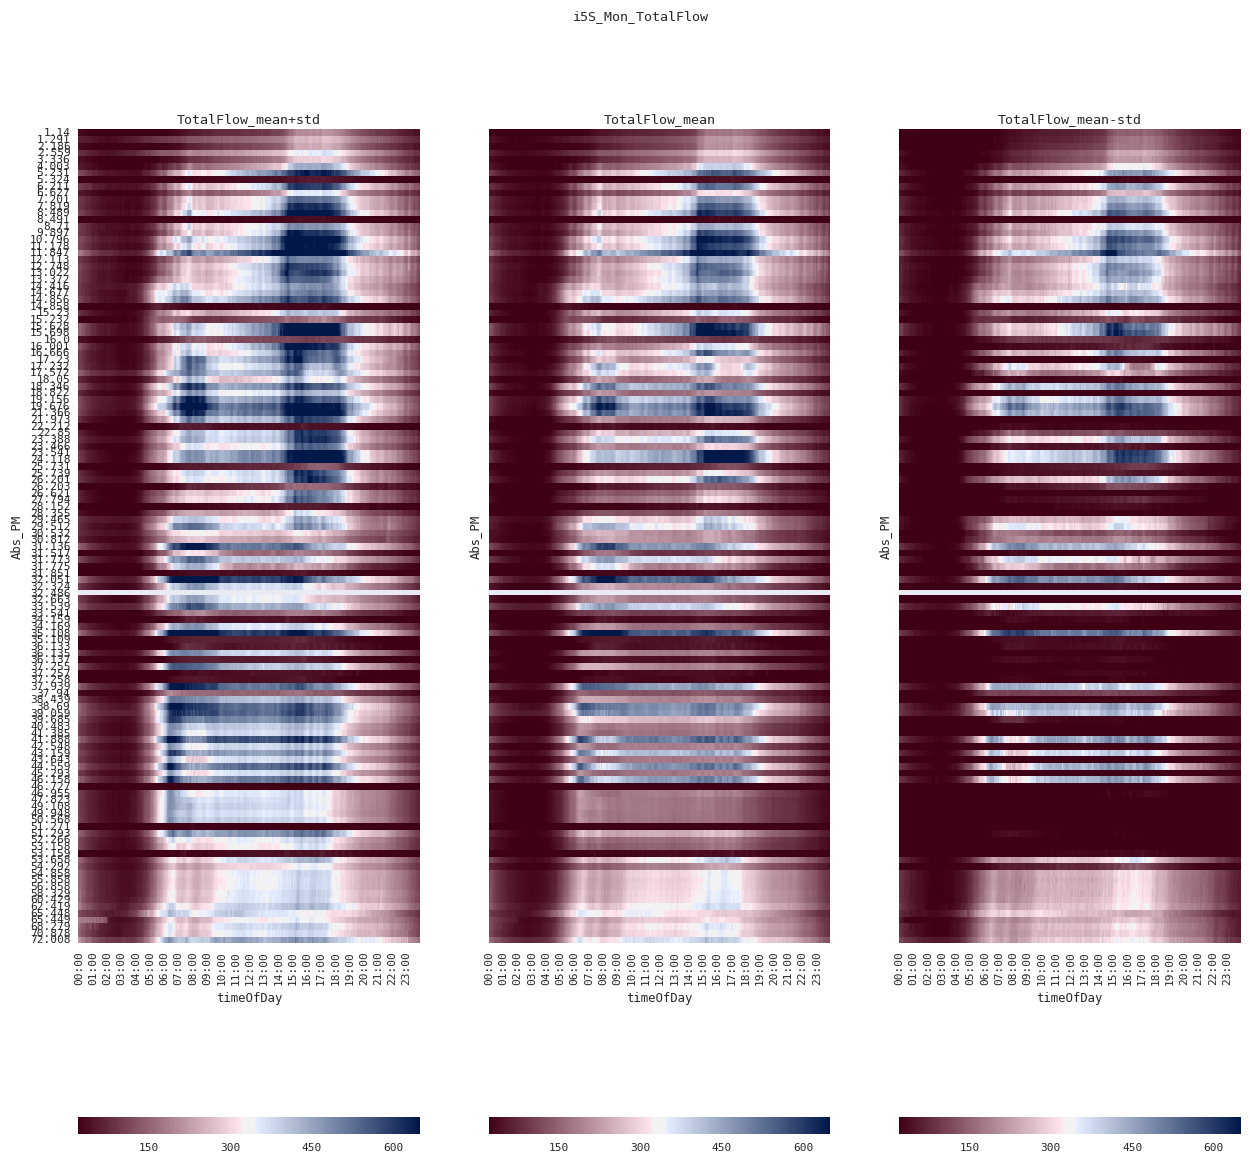

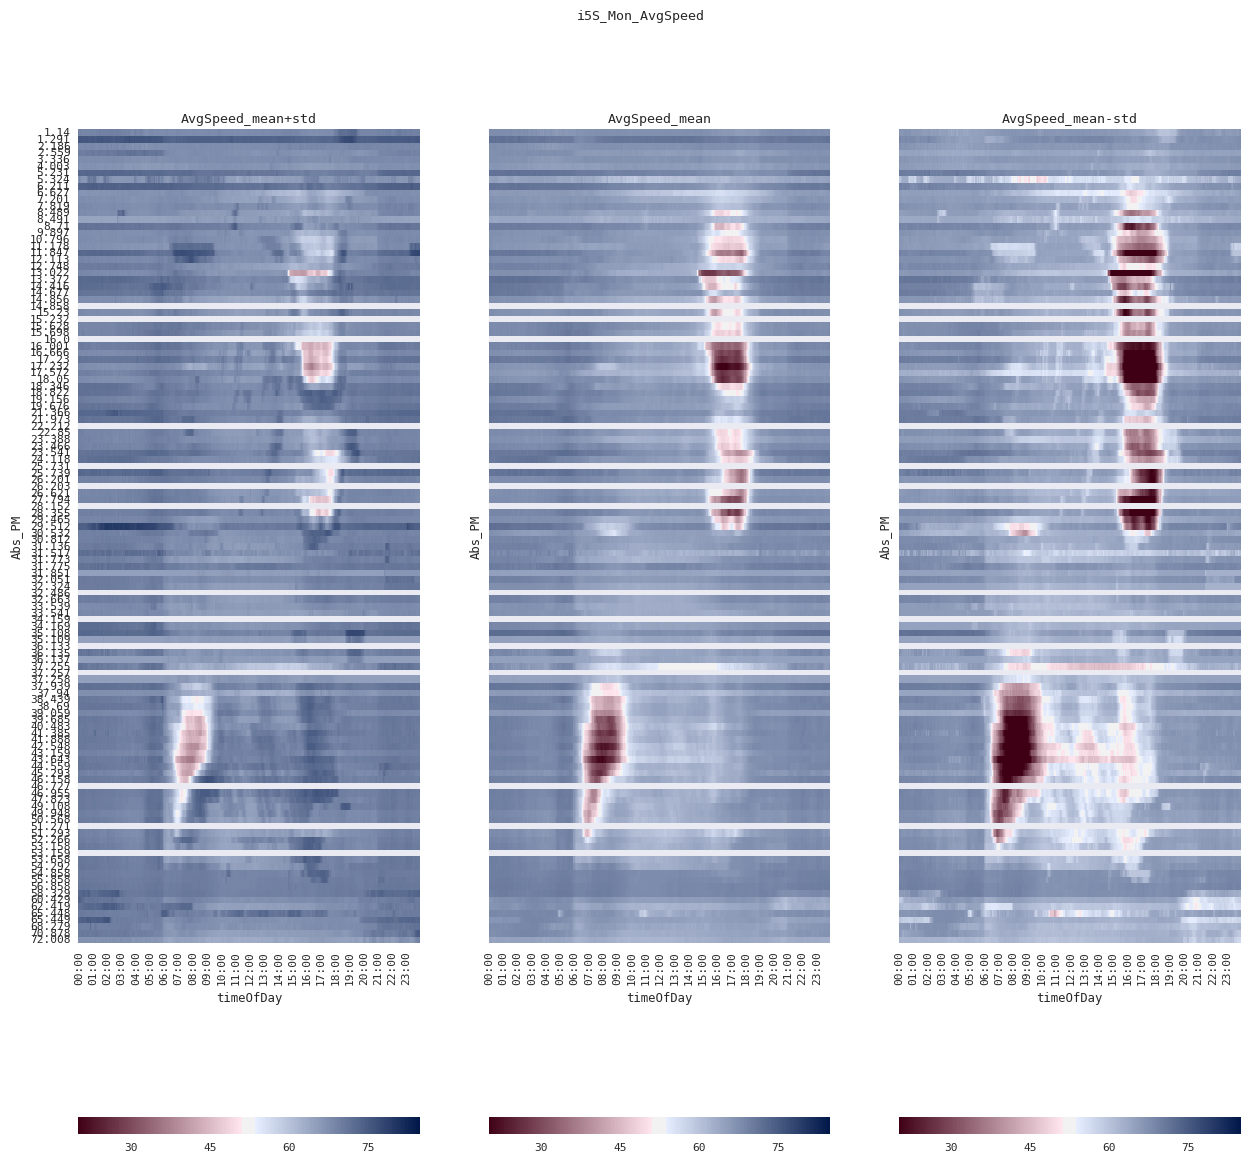

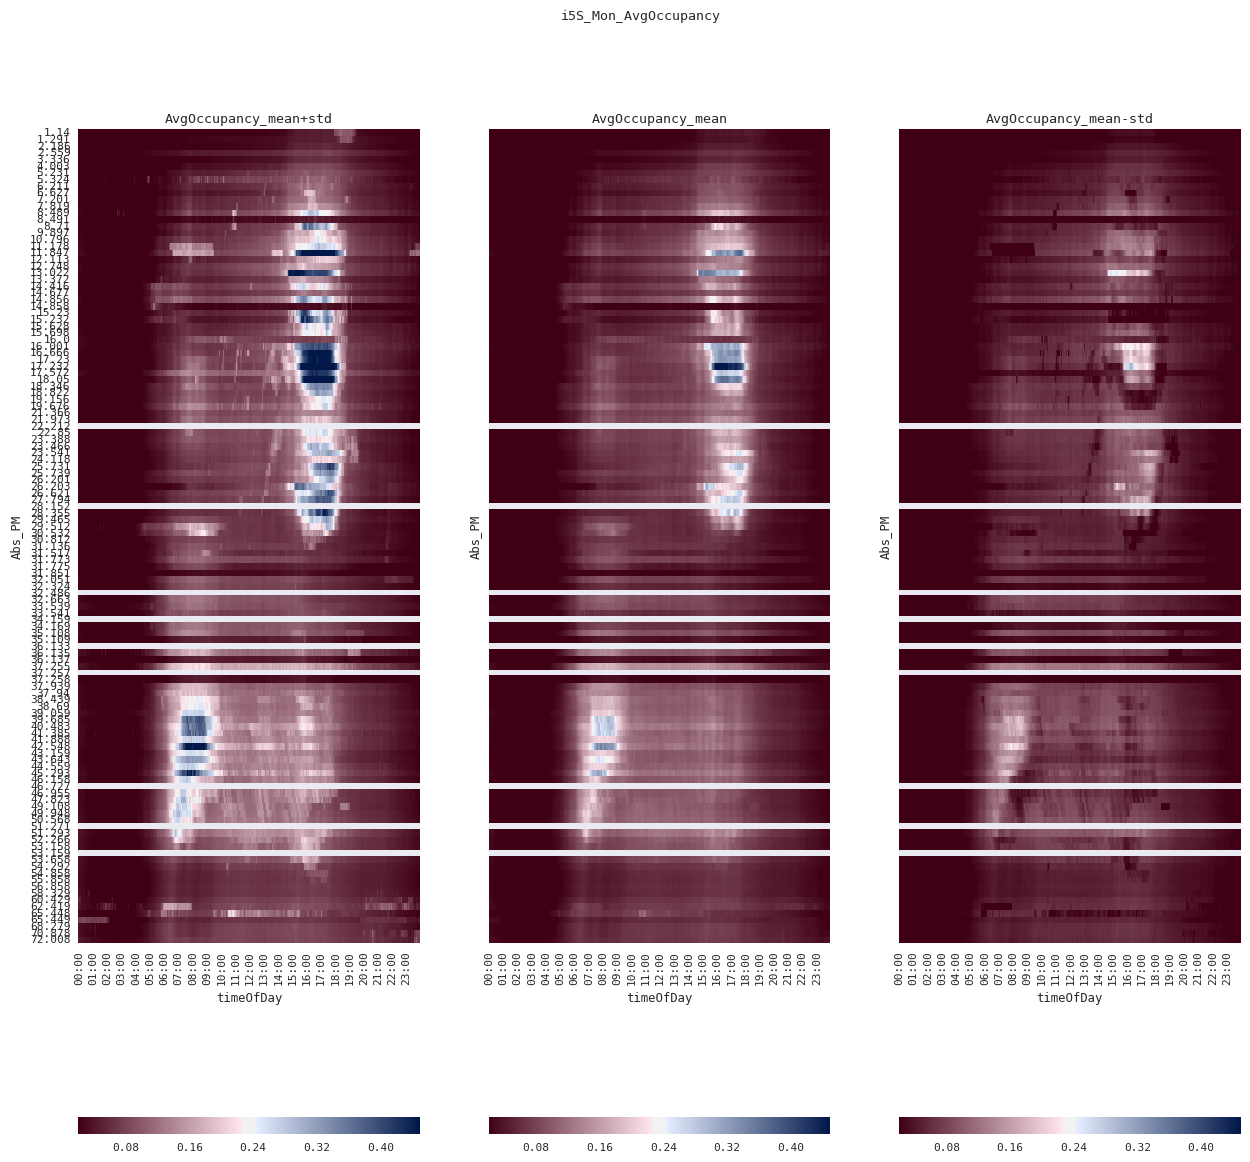

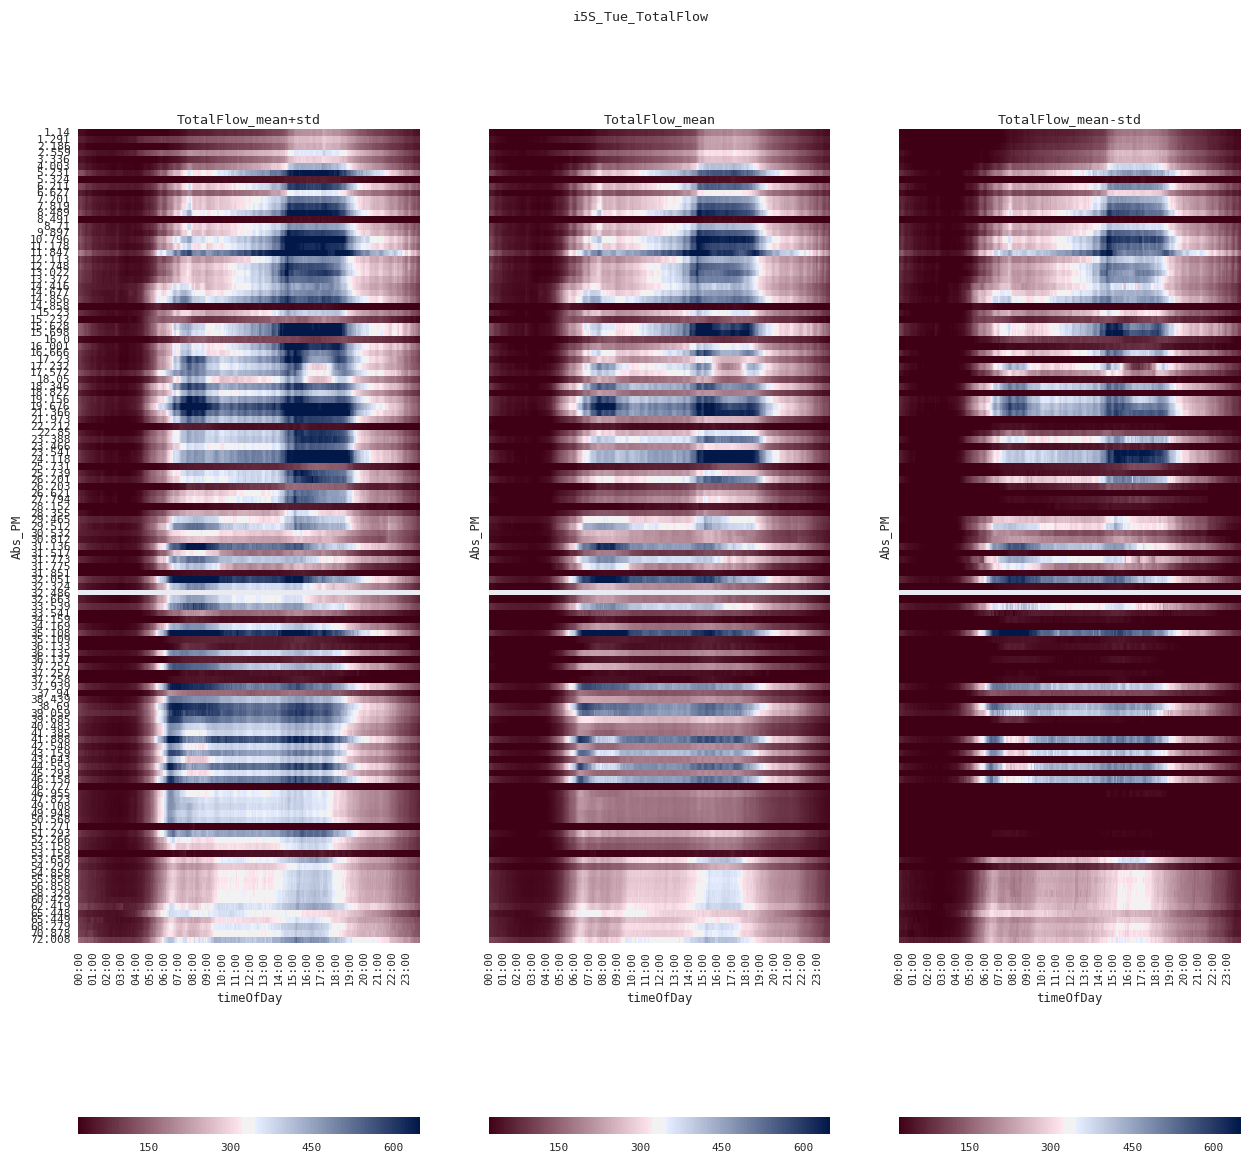

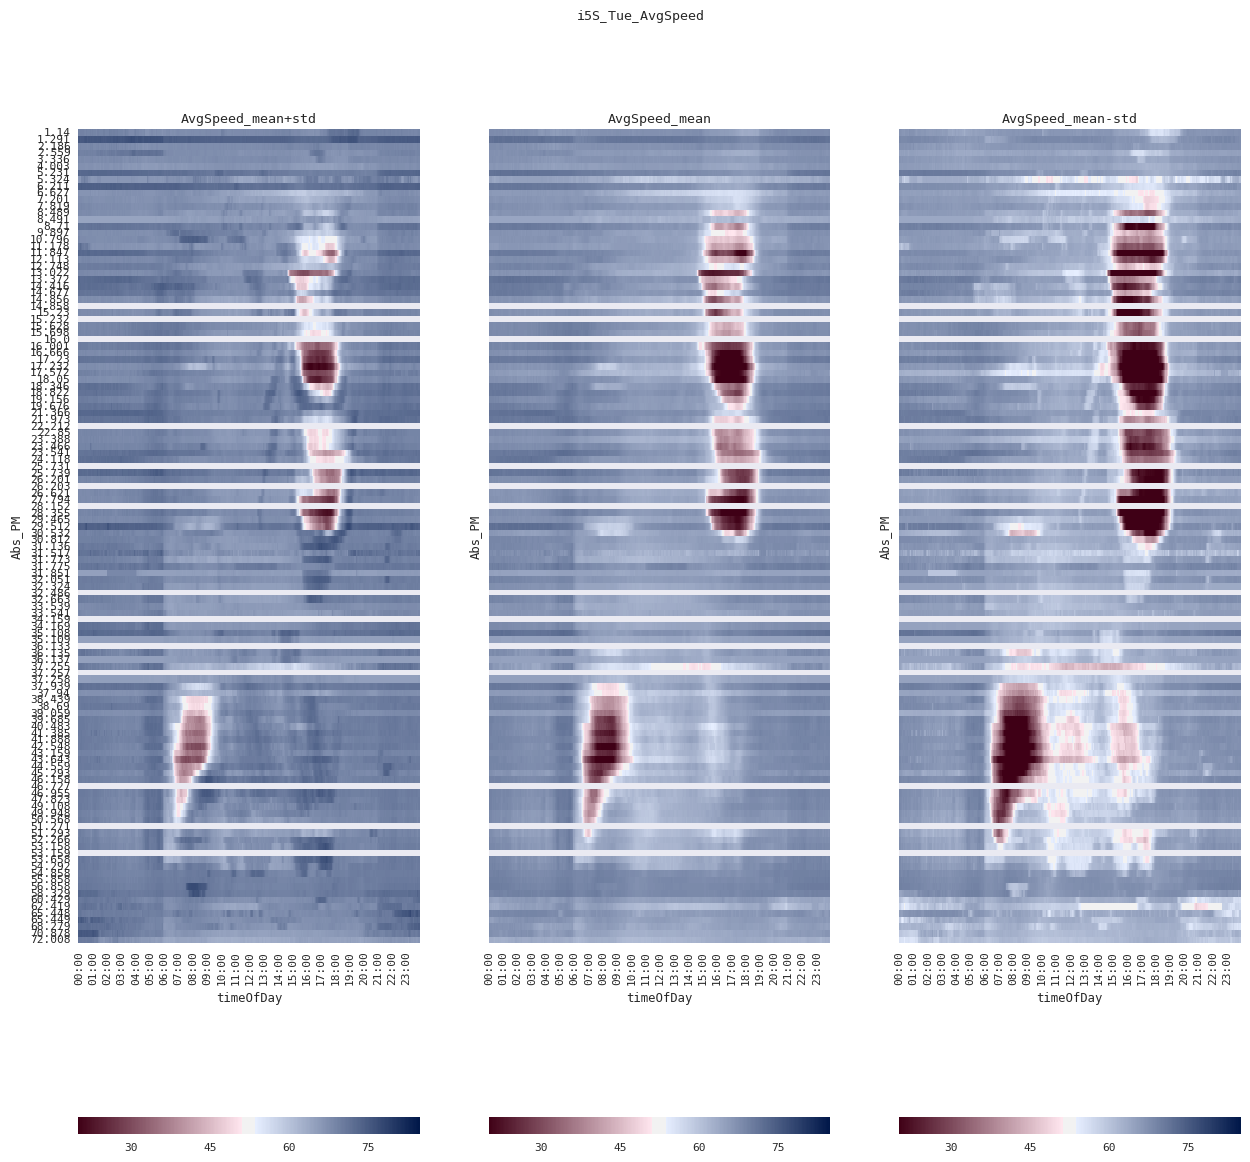

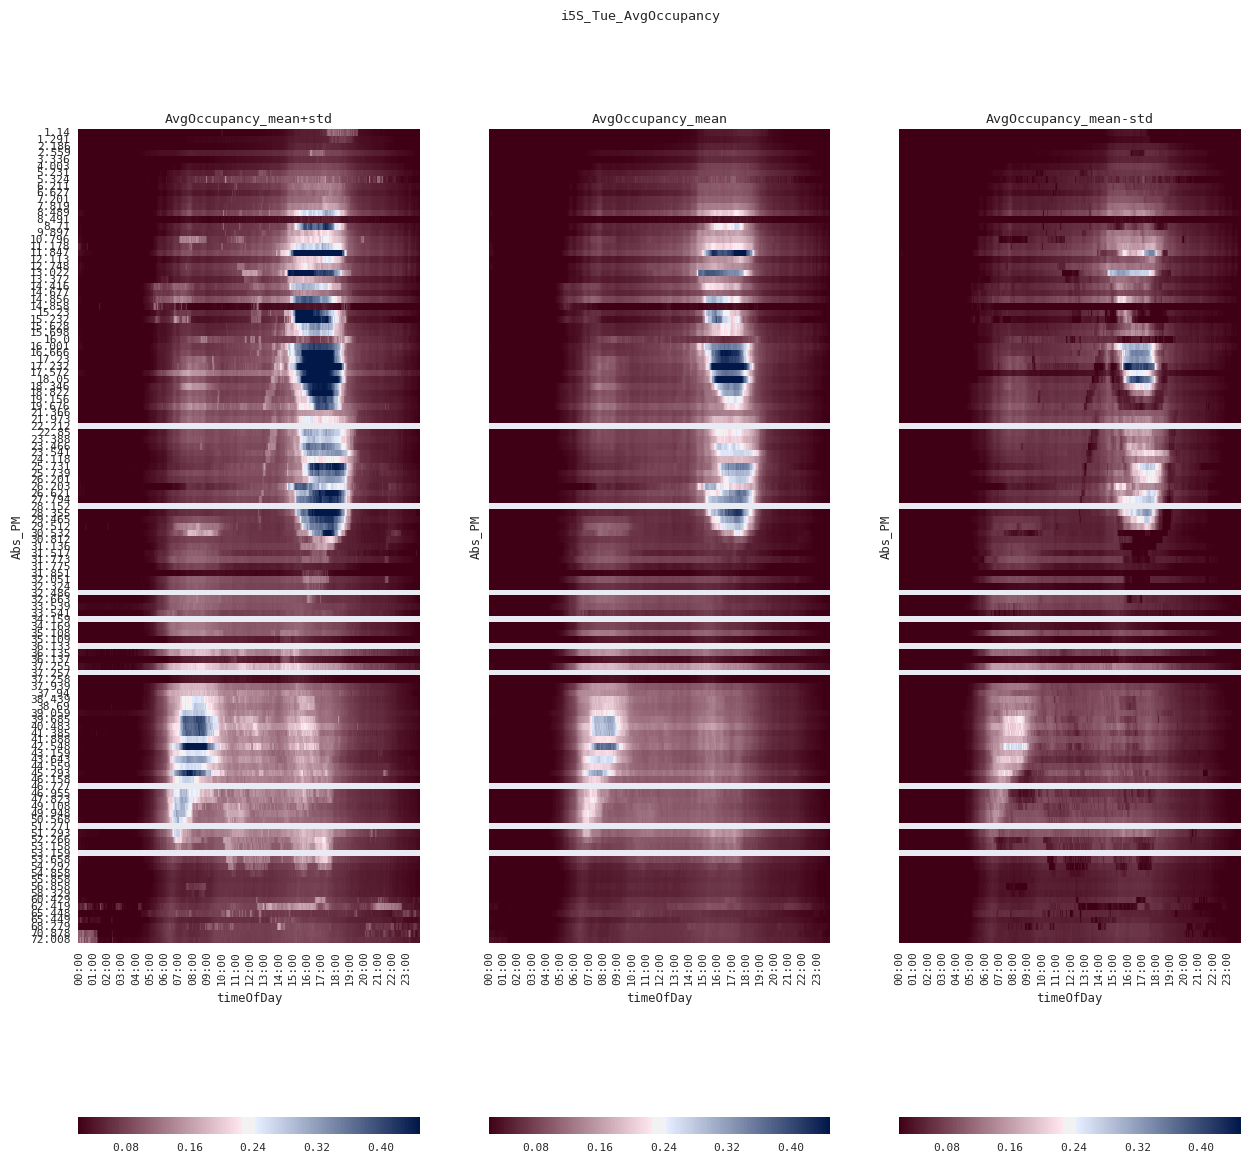

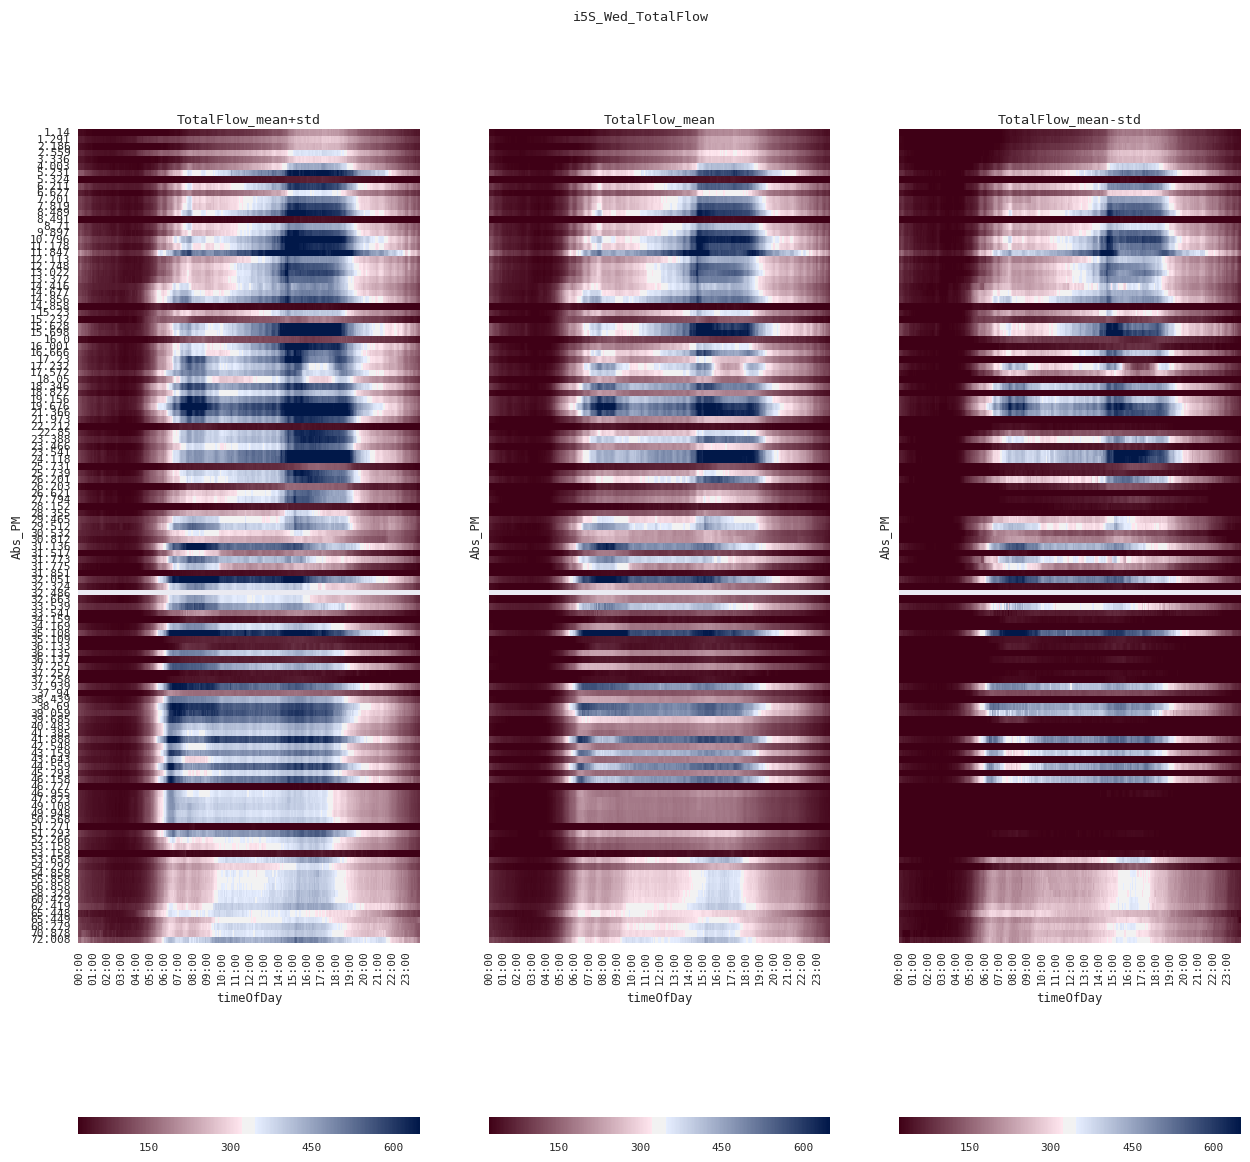

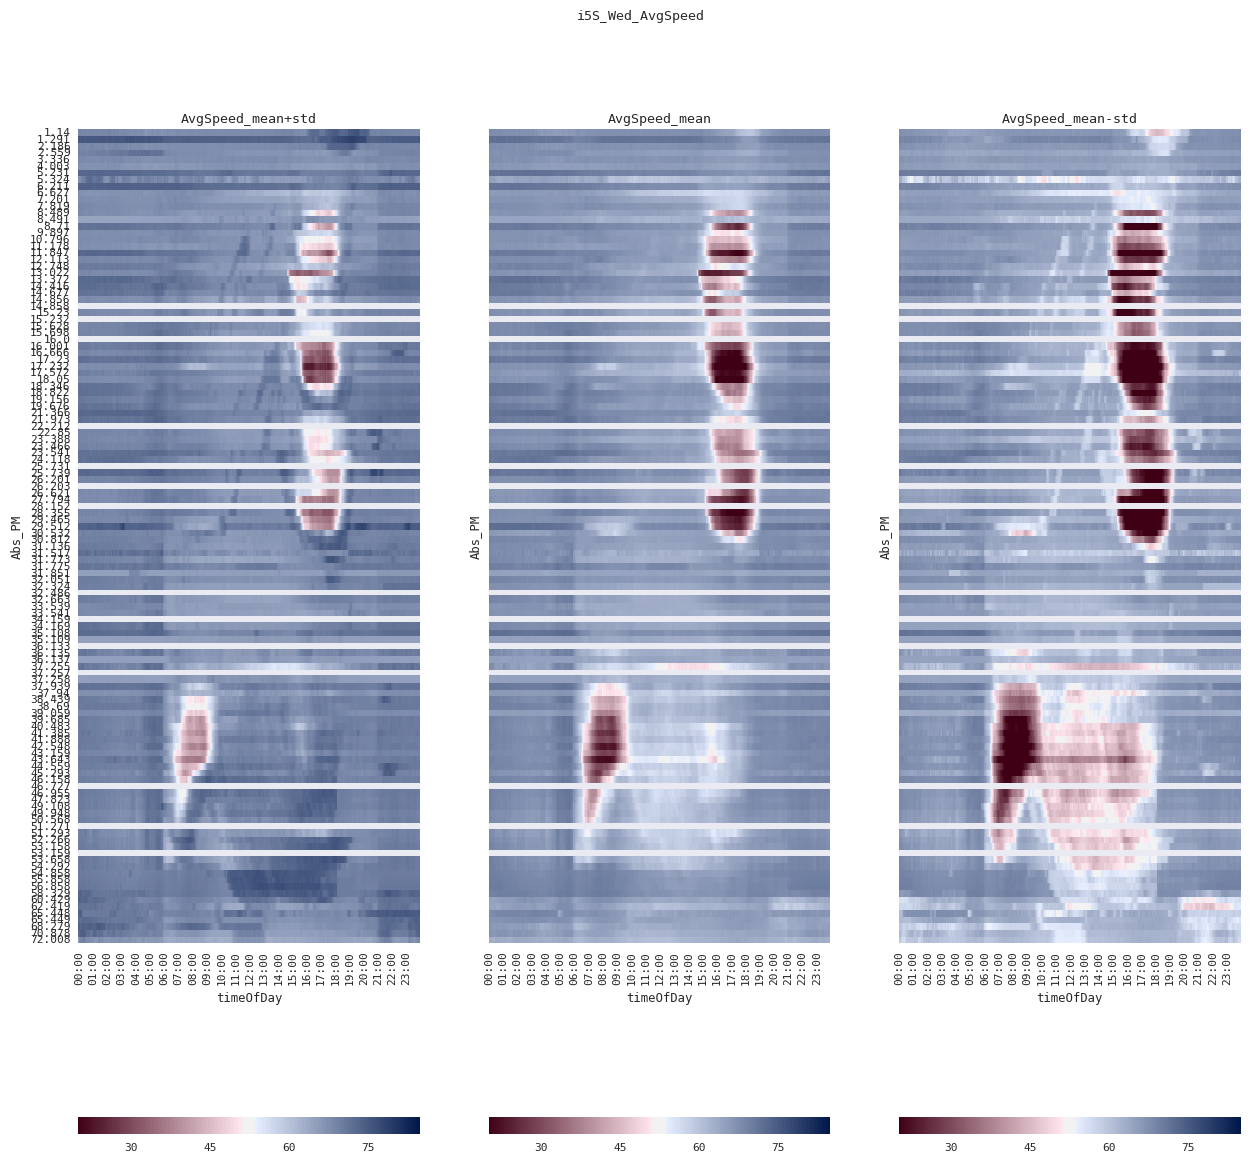

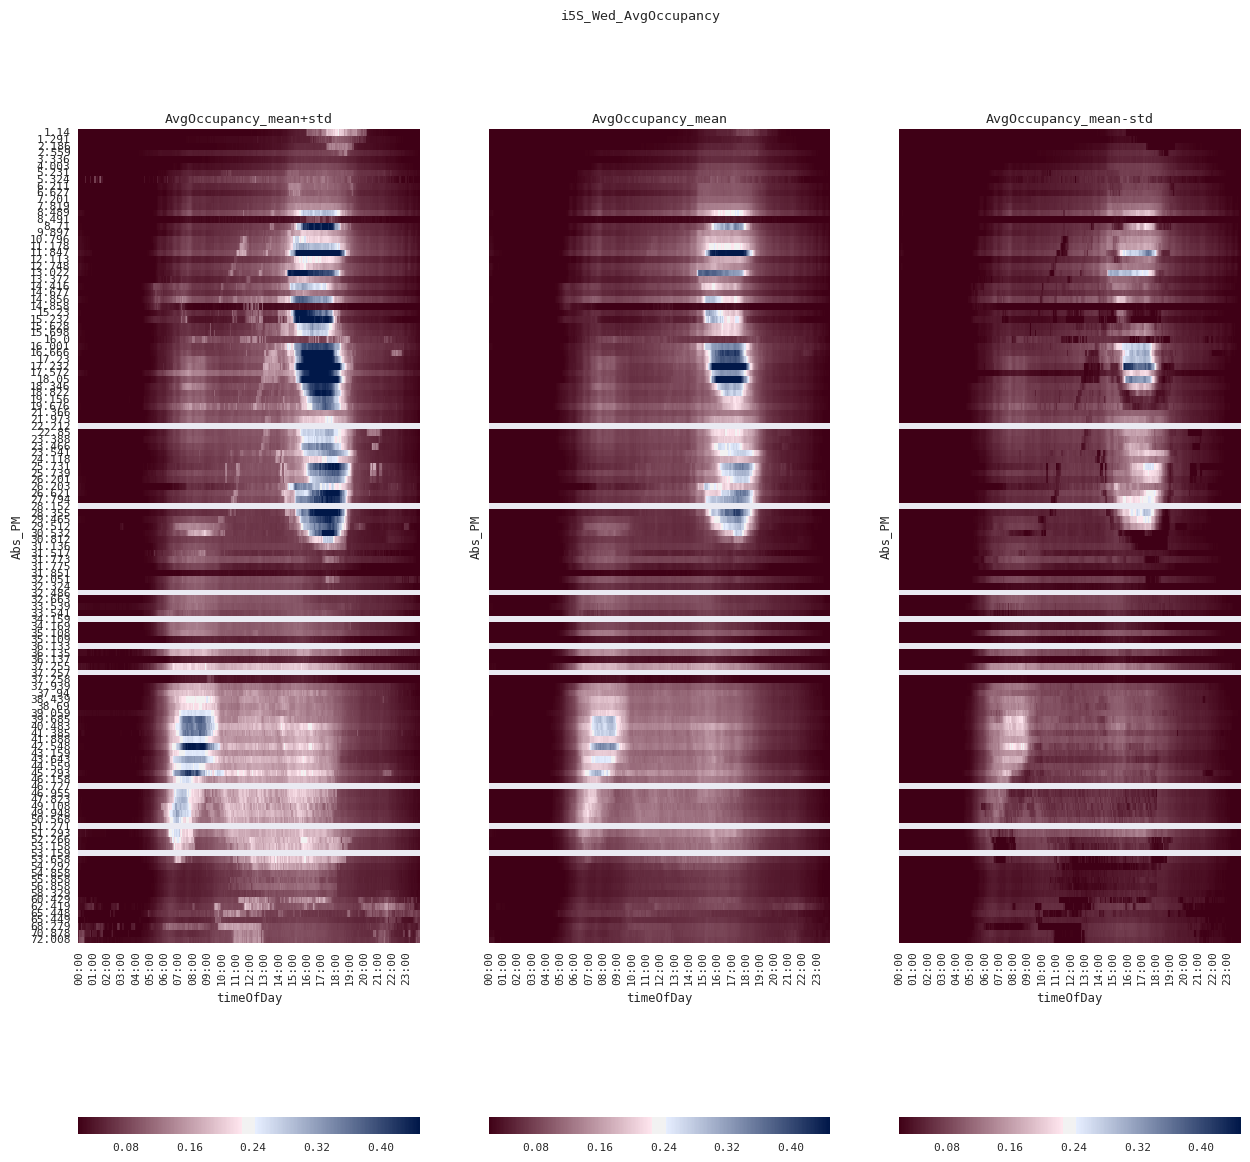

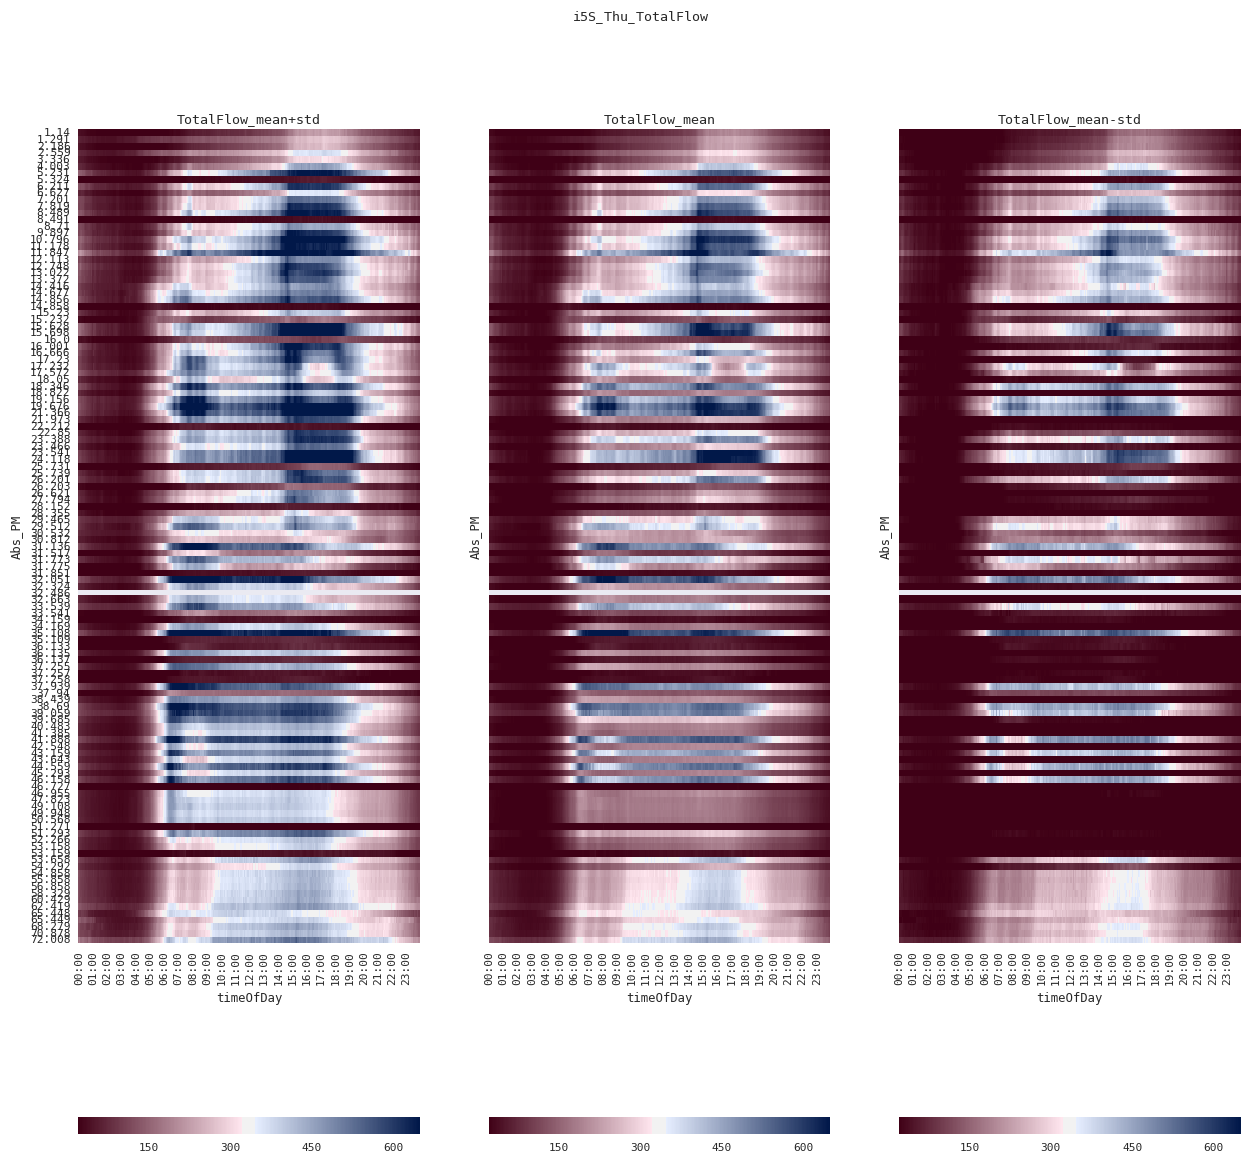

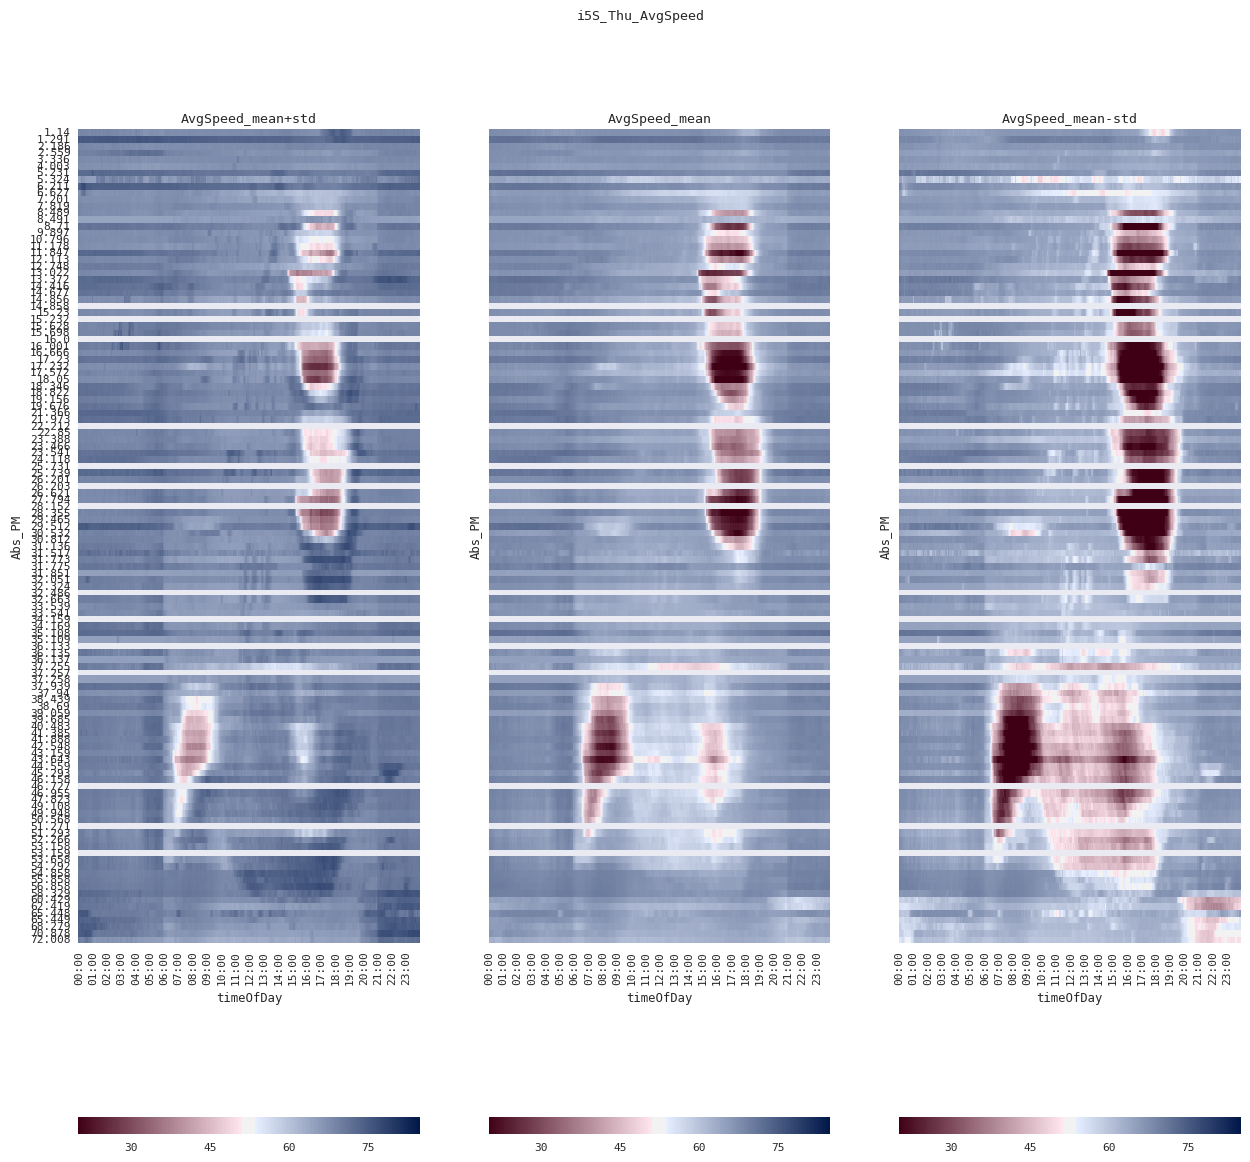

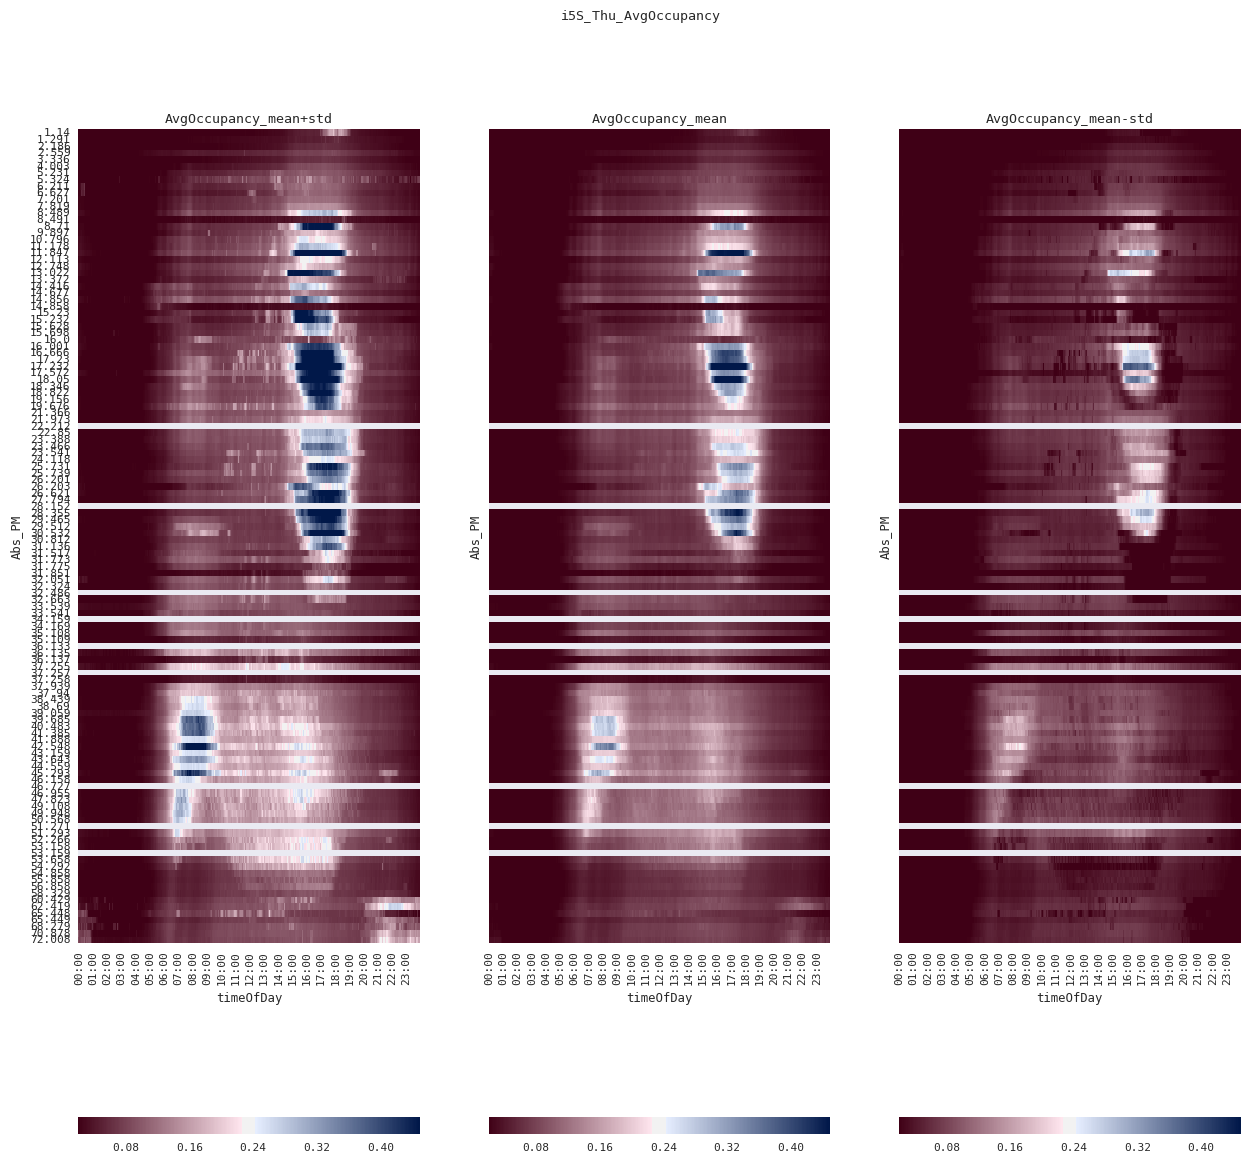

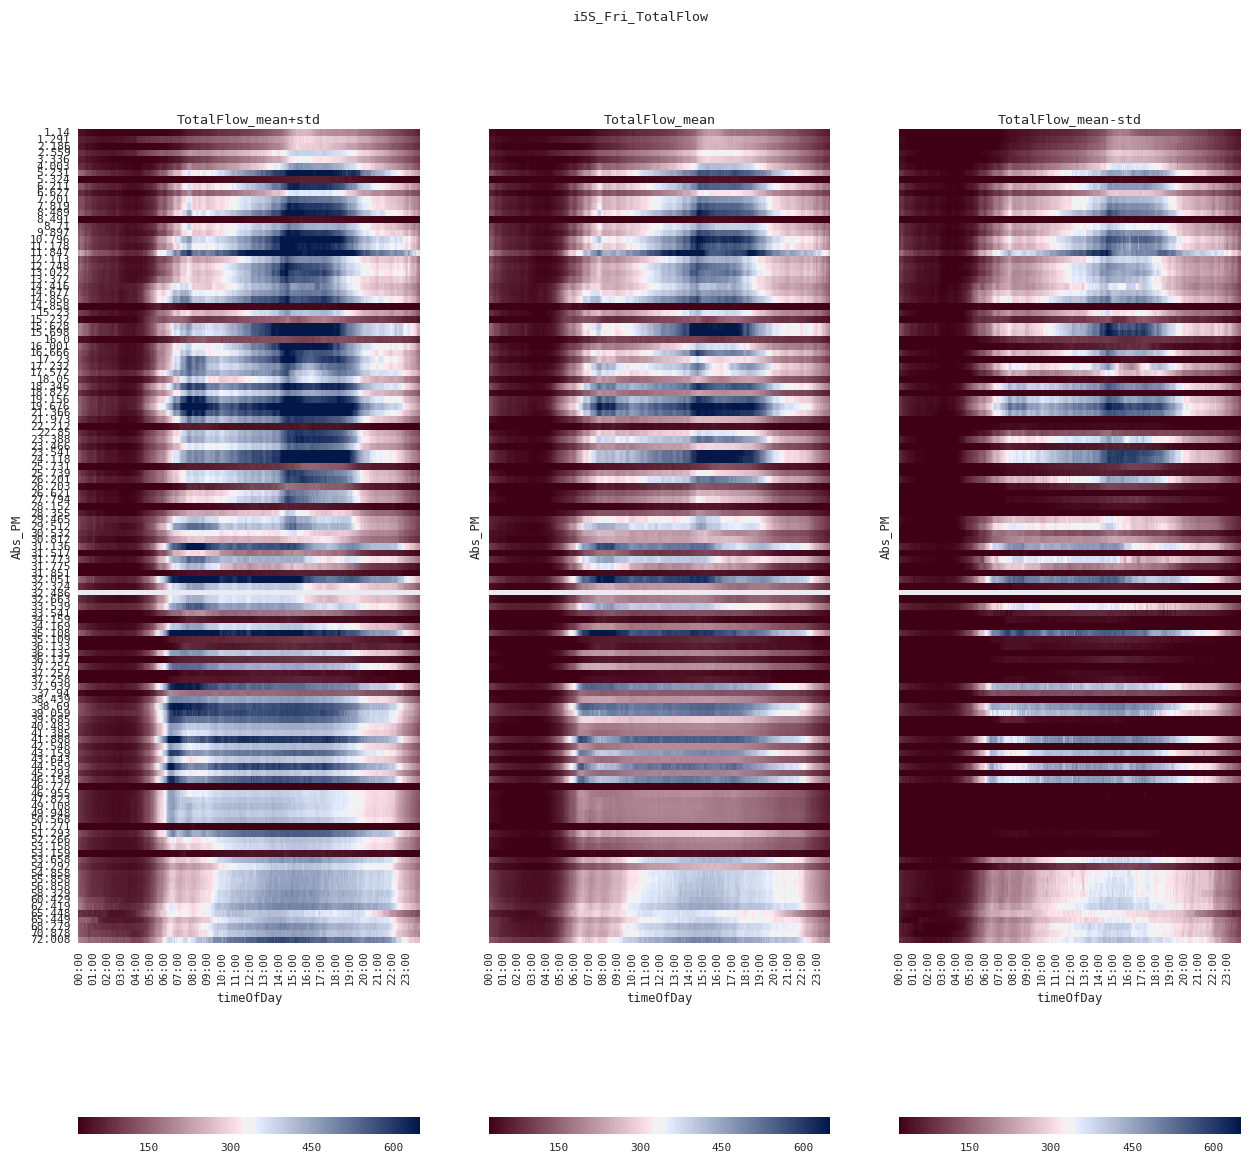

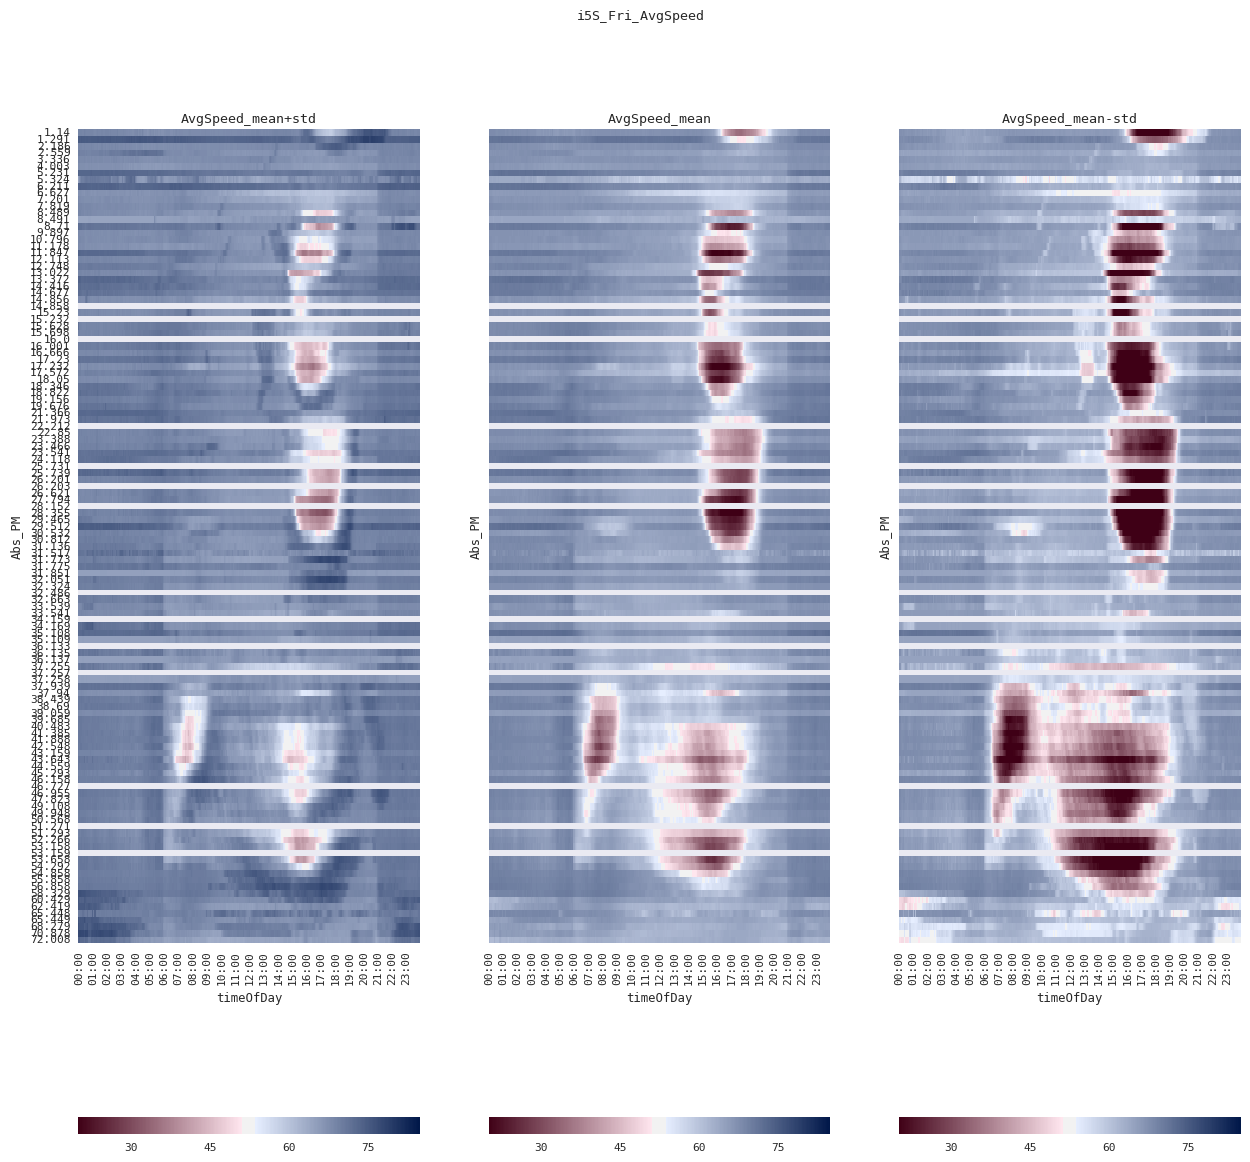

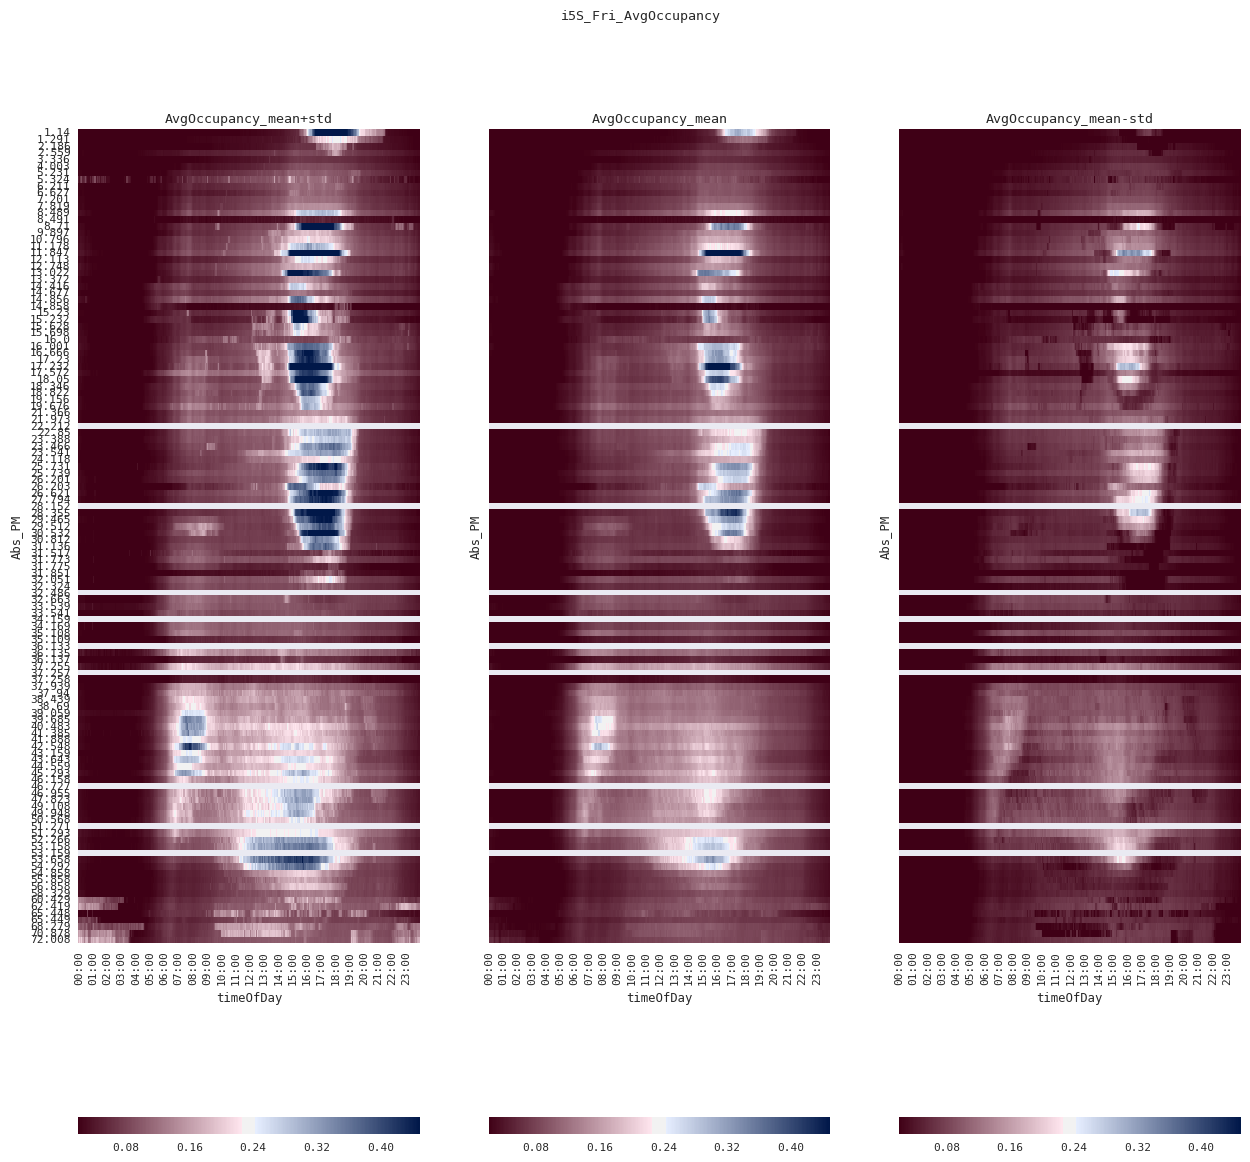

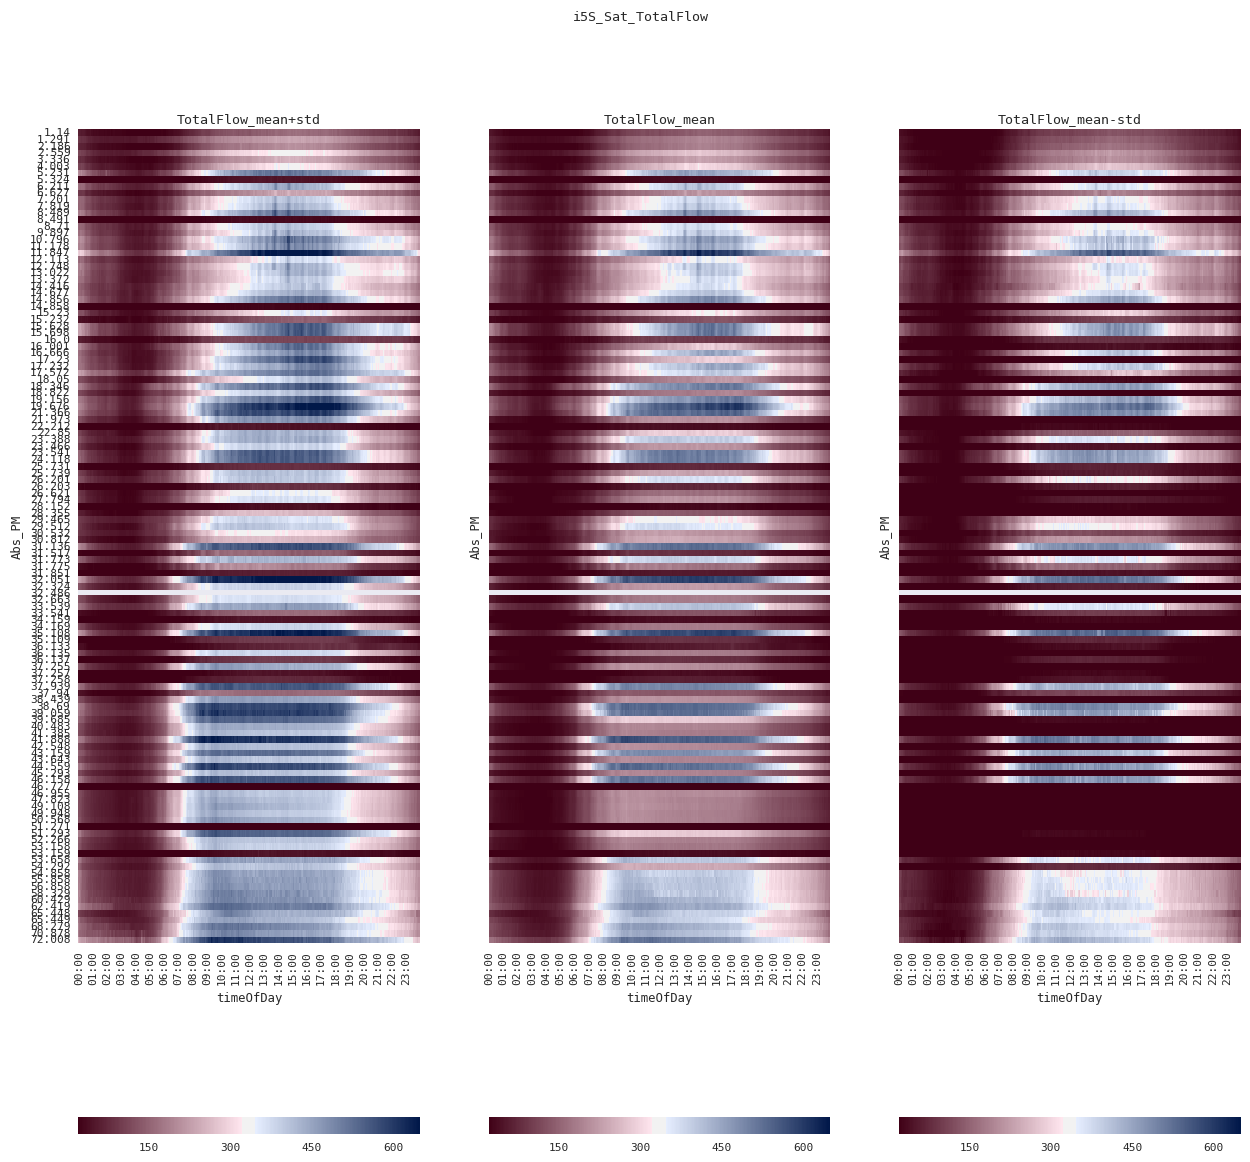

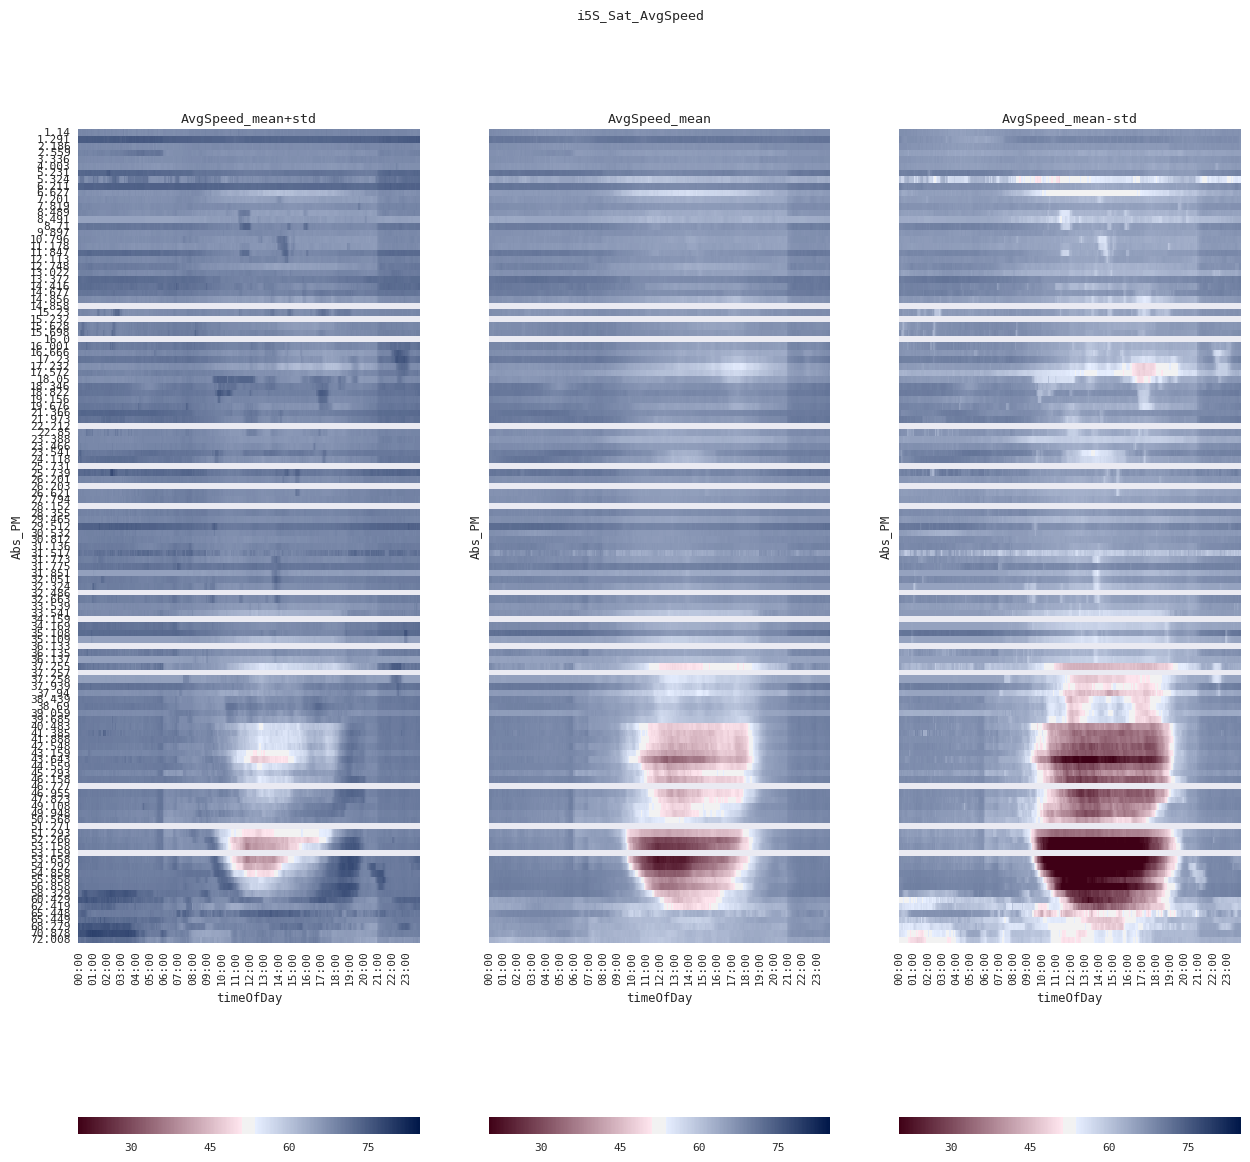

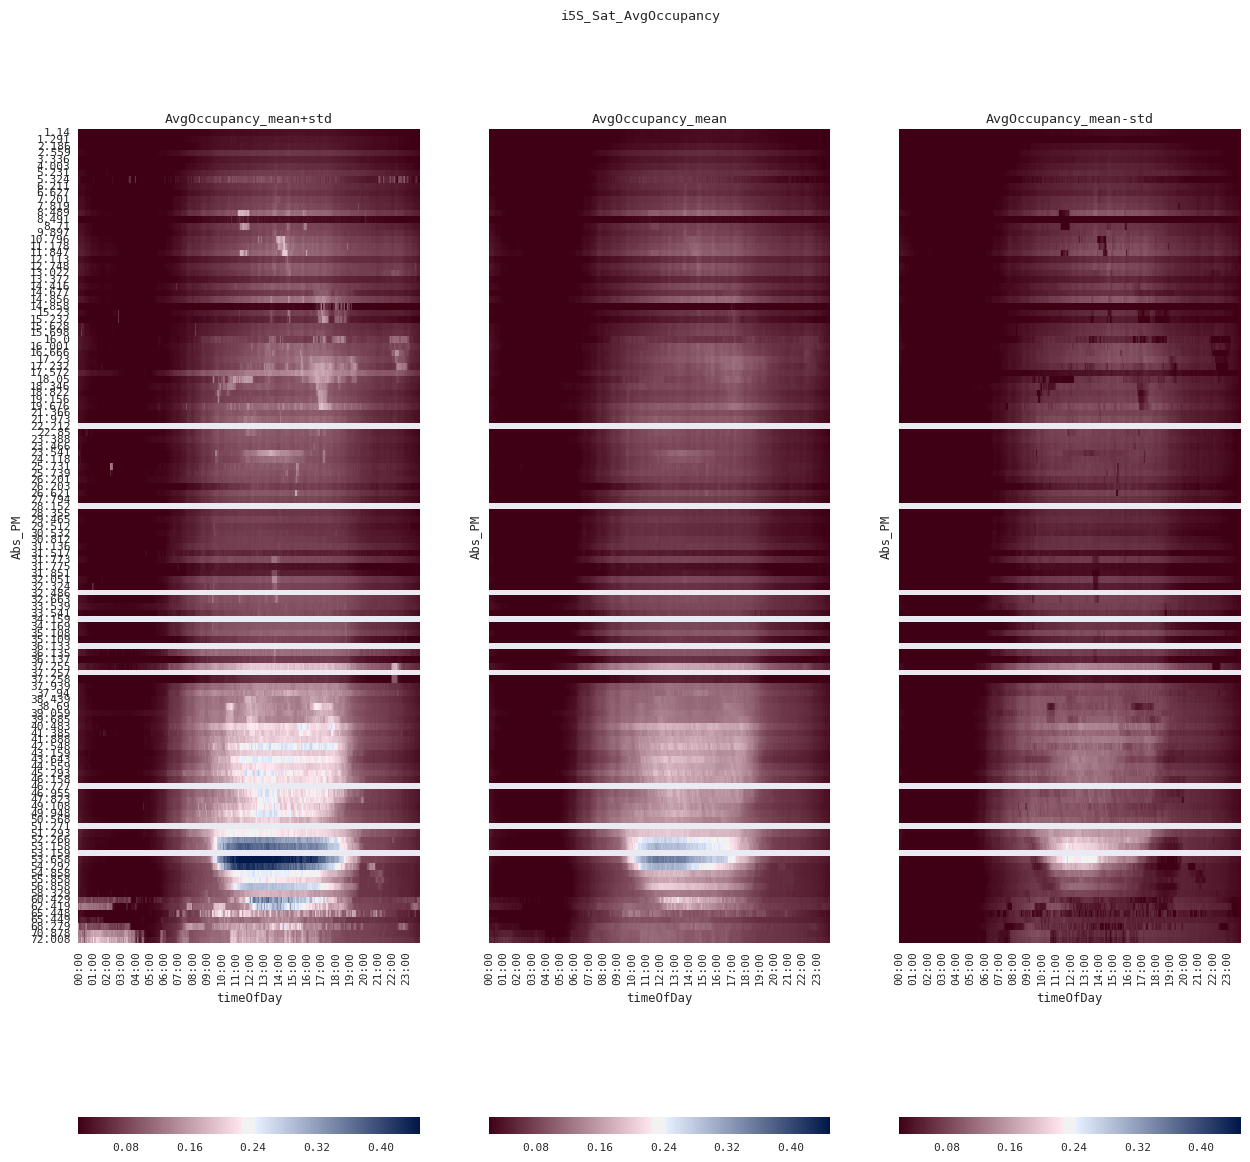

In [9]:
def plot_stats(df, stat, minmax, _title):
    f, axes = plt.subplots(1, 3, figsize=(15, 15), sharey=True)
    f.suptitle(_title)
    sns.despine(left=True)
    sns.set(context="paper", font="monospace")

    all_stats = stat.replace(" ", "")+'_mean'
    all_stats = [all_stats+"+std", all_stats, all_stats+"-std"]
    
    i=0
    for a in all_stats:
        sns.heatmap(df.pivot("Abs_PM", "timeOfDay", a), 
                            vmin = minmax[0],
                            vmax = minmax[1],
                            ax=axes[i],
                            xticklabels=12, 
                            cmap=cmap,
                            cbar=True,
                            cbar_kws = {'orientation': 'horizontal'})
        axes[i].set_title(a)
        i += 1
    f.savefig('../images/'+_title+'.pdf', bbox_inches='tight')
    return None

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

for weekday_num in range(6):
    i5S_temp = get_fwy_dataByDay(i5S, weekday_num, overwrite=True)
    i5S_temp_stats = create_freeway_stats(i5S_temp)
    for stat in ['Total Flow', 'Avg Speed', 'Avg Occupancy']:
        title = 'i5S_'+weekday[weekday_num]+"_"+stat.replace(" ", "")
        plot_stats(i5S_temp_stats, stat, threshold[stat], title )

## Results

Gaining insights across all days is difficult with the format of the notebook, so all pdf's were consolidated into one file. On paging through, shifts across the days are viewable.

As expected, the traffic patterns for Saturday and Sunday were very different from the rest of the days. On weekdays, we do see different patterns throughout the week with some areas being particularly congested.